In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df_clean = pd.read_csv('hr_raw_data_clean.csv', index_col=0)

In [26]:
df_clean.head()

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,department
0,52,No,non-travel,2015.72,6,3,other,1,1,M,251.96,3,5,research director,3,unknown,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,1972,195370.00,Yes,research & development
1,53,No,non-travel,2063.39,1,4,life sciences,2,3,M,257.92,2,5,manager,3,unknown,16665.83,43331.17,0,NaN,14,3.0,1,Full Time,1,34.0,5,3.0,33,11,9,1971,199990.00,Yes,general
2,43,No,travel_rarely,1984.25,4,2,technical degree,3,3,M,248.03,3,5,manager,4,married,16026.67,41669.33,1,No,11,3.0,4,Full Time,0,22.0,3,NaN,22,11,15,1981,192320.00,Yes,research & development
3,48,No,travel_rarely,1771.40,2,4,medical,4,1,F,221.42,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3.0,2,Full Time,2,NaN,2,NaN,20,5,6,1976,171690.00,No,research & development
4,47,No,non-travel,1582.77,3,3,technical degree,5,1,F,197.85,4,4,sales executive,1,divorced,12783.92,33238.20,2,No,12,3.0,4,Full Time,1,NaN,5,3.0,19,2,8,1977,153407.04,No,sales


### FUNCIÓN PARA HOMOGENEIZAR DATOS DE "AGE"

In [27]:
def age(year):
    '''Mantenemos la columna edad actualizada restando el año actual 
    con el año de nacimiento registrado en la columna "datebrith".
    usamos la libreria datetime
    '''
    age_def = (datetime.now().year) - year
    return age_def

df_clean["age"] = df_clean["datebirth"].apply(age)

df_clean.sample(5)

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,department
209,33,No,non-travel,556.26,5,2,life sciences,210,2,M,69.53,3,2,sales executive,2,unknown,4492.84,11681.39,1,No,14,3.0,4,Part Time,1,10.0,3,3.0,10,5,3,1991,53914.11,Yes,sales
114,52,No,travel_rarely,1288.65,8,4,life sciences,115,2,M,161.08,2,3,research director,2,married,10408.33,27061.67,5,No,16,3.0,4,Full Time,2,16.0,5,1.0,10,4,7,1972,124900.00,No,research & development
959,36,Yes,travel_frequently,208.62,25,4,life sciences,960,4,F,26.08,3,1,research scientist,2,divorced,1685.00,4381.00,1,NaN,19,3.0,1,Part Time,1,10.0,3,2.0,10,7,8,1988,20220.00,Yes,research & development
225,43,No,non-travel,1842.80,2,1,life sciences,226,3,M,230.35,3,4,manager,3,unknown,14884.17,38698.83,0,Yes,13,not rated,4,Full Time,0,21.0,3,2.0,20,2,10,1981,178610.00,No,general
673,25,No,non-travel,286.21,18,1,life sciences,674,2,M,35.78,3,1,laboratory technician,3,married,2311.67,6010.33,0,No,12,3.0,3,Part Time,1,NaN,2,3.0,5,1,2,1999,27740.00,Yes,research & development


In [28]:
df_clean["age"].isnull().sum()

0

### FUNCIÓN PARA REEMPLAZAR , por . Y ELIMINAR $

In [29]:
def replace_dot(cadena):
    ''' Para las columnas cuyos valores son object con separación con comas y símbolo 
    de $ al final. 
    Sustituir , por . y eliminar &
    Pasar el valor a float'''
    try:
        # Reemplazar las comas por puntos en la cadena
        return float(cadena.replace(",", ".").replace("$",""))
    
    except:
        # Si ocurre algún error (por ejemplo, si el argumento no es una cadena),
        # devolver np.nan (valor Not a Number) para indicar un valor inválido o no disponible.
        return np.nan

lista_columnas=["monthlyincome", "monthlyrate", "performancerating", "totalworkingyears", "worklifebalance", "sameasmonthlyincome", "salary"]

for columna in lista_columnas:
     df_clean[columna] = df_clean[columna].apply(replace_dot)

df_clean.head(5)

KeyError: 'sameasmonthlyincome'

### redondear valores de tipo float con muchos decimales, a 2 decimales

In [ ]:
df_clean["dailyrate"] = round(df_clean["dailyrate"], 2)
df_clean["hourlyrate"] = round(df_clean["hourlyrate"], 2)
df_clean.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,52,No,NaN,2015.72,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,16280.83,42330.17,7,Y,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,NaN,15,15,16280.83,1972,195370.0,NaN,NaN,Yes
1,53,No,NaN,2063.39,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,43331.17,0,NaN,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,NaN,1971,199990.0,NaN,NaN,1


In [ ]:
def eliminar_columnas(df, nombre_columna):
    df_drop = df.drop(nombre_columna, axis=1, inplace=True) # hay que asignarle una variable para que lo guarde. Comprobado que funciona, cambiamos el inplace por True.
    print(f'La columna {nombre_columna} se ha eliminado correctamente.')
    return df_drop.head(1)

### FUNCIÓN MAP PARA HOMOGENEIZAR REMOTEWORK

In [ ]:
diccionario_remote = {"1": "Yes", "0": "No", "Yes": "Yes", "True": "Yes", "False": "No"}
df_clean["remotework"] = df_clean["remotework"].map(diccionario_remote)

df_clean.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,52,No,NaN,2015.72,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,16280.83,42330.17,7,Y,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,NaN,15,15,16280.83,1972,195370.0,NaN,NaN,Yes
1,53,No,NaN,2063.39,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,43331.17,0,NaN,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,NaN,1971,199990.0,NaN,NaN,Yes


### FUNCIÓN PARA PONER EN MINÚSCULAS

In [ ]:
def minusculas(cadena): 
    try:
        return cadena.lower()
    except:
        return "no data"

lista_columnas=["department", "educationfield", "jobrole", "roledepartament"]
for col in lista_columnas:
    df_clean[col] = df_clean[col].apply(minusculas)

## FUNCION PARA RATIOS DE "ENVIRONMENTSATISFACTION"

In [ ]:
def clean_satisfaction(valoracion):
    try: 
        if valoracion >= 10:
            return int(str(valoracion/10).split('.')[0])
        else: 
            return valoracion
    except:
            return np.nan


df_clean["environmentsatisfaction"] = df_clean["environmentsatisfaction"].apply(clean_satisfaction)

### GENDER

In [ ]:
dict_gender = {0: "M", 1: "F"}

df_clean["gender"] = df_clean["gender"].map(dict_gender)

# 14 de noviembre de 2024

### FUNCIÓN PARA BORRAR COLUMNAS

In [ ]:
def clean (dataframe,col_data):
    
    return dataframe.drop([col_data],axis=1, inplace= True)


In [ ]:
lista_drop= ["sameasmonthlyincome", "over18", "numberchildren", "employeecount"]

for col in lista_drop:
    clean(df_clean, col)


In [ ]:
df_clean[["yearsincurrentrole", "yearssincelastpromotion", "yearsatcompany"]].sample(10)

,yearsincurrentrole,yearssincelastpromotion,yearsatcompany
517,"6,0",8,21
1332,NaN,0,3
273,NaN,2,9
7,NaN,11,20
874,NaN,7,8
352,NaN,4,15
884,"2,0",2,3
670,NaN,0,4
1046,NaN,2,2
1603,NaN,7,8


In [ ]:
df_clean[["joblevel","jobrole", "roledepartament","department"]].sample(10)

,joblevel,jobrole,roledepartament,department
1104,1,human resources,human resources - human resources,human resources
507,3,healthcare representative,no data,no data
651,1,laboratory technician,laboratory technician - research & developm...,research & development
290,2,sales executive,no data,no data
1658,1,laboratory technician,laboratory technician - research & developm...,research & development
836,1,laboratory technician,no data,no data
359,1,research scientist,no data,no data
1399,1,sales representative,no data,no data
138,4,manager,manager - sales,sales
440,2,manufacturing director,manufacturing director - research & develop...,research & development


### GUARDAR CSV

In [ ]:
df_clean.to_csv("hr_raw_data_clean.csv")

18.11.2024 PROYECTO

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
df_clean = pd.read_csv('hr_raw_data_clean.csv', index_col=0)
df_clean.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
0,52,No,NaN,2015.72,no data,6,3,no data,1,1,M,NaN,3,5,research director,3,NaN,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,NaN,15,15,1972,195370.0,no data,Yes
1,53,No,NaN,2063.39,no data,1,4,life sciences,2,3,M,NaN,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,1971,199990.0,no data,Yes
2,43,No,travel_rarely,1984.25,research & development,4,2,technical degree,3,3,M,NaN,3,5,manager,4,Married,NaN,41669.33,1,No,11,3.0,4,NaN,0,22.0,3,NaN,22,NaN,11,15,1981,192320.0,manager - research & development,Yes
3,48,No,travel_rarely,1771.40,no data,2,4,medical,4,1,F,NaN,3,4,research director,3,Married,14307.50,37199.50,3,NaN,19,3.0,2,Full Time,2,NaN,2,NaN,20,NaN,5,6,1976,171690.0,no data,No
4,47,No,NaN,1582.77,no data,3,3,technical degree,5,1,F,NaN,4,4,sales executive,1,Divorced,12783.92,33238.20,2,No,12,3.0,4,NaN,1,NaN,5,3.0,19,NaN,2,8,1977,NaN,no data,No


ELIMINAR '-' EN COLUMNA DISTANCEFROMHOME

In [ ]:
'''Sacando columnas numéricas para ver si hay alguna columna más con negativos aparte del distancefromhome'''
df_numericas = df_clean.select_dtypes(include=['number'])

In [ ]:
''' ¿Cuántas veces está el - en cada columna numérica? Vemos que solo está presente en distancefromhome'''
for col in df_numericas.columns:
    num_menos_col = df_numericas[col].astype(str).str.contains('-', regex=False).sum()
    print(f' - está presente en {col} {num_menos_col} veces.')

 - está presente en age 0 veces.
 - está presente en dailyrate 0 veces.
 - está presente en distancefromhome 202 veces.
 - está presente en education 0 veces.
 - está presente en employeenumber 0 veces.
 - está presente en environmentsatisfaction 0 veces.
 - está presente en hourlyrate 0 veces.
 - está presente en jobinvolvement 0 veces.
 - está presente en joblevel 0 veces.
 - está presente en jobsatisfaction 0 veces.
 - está presente en monthlyincome 0 veces.
 - está presente en monthlyrate 0 veces.
 - está presente en numcompaniesworked 0 veces.
 - está presente en percentsalaryhike 0 veces.
 - está presente en performancerating 0 veces.
 - está presente en relationshipsatisfaction 0 veces.
 - está presente en stockoptionlevel 0 veces.
 - está presente en totalworkingyears 0 veces.
 - está presente en trainingtimeslastyear 0 veces.
 - está presente en worklifebalance 0 veces.
 - está presente en yearsatcompany 0 veces.
 - está presente en yearssincelastpromotion 0 veces.
 - está pre

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   int64  
 1   attrition                 1678 non-null   object 
 2   businesstravel            877 non-null    object 
 3   dailyrate                 1678 non-null   float64
 4   department                1678 non-null   object 
 5   distancefromhome          1678 non-null   int64  
 6   education                 1678 non-null   int64  
 7   educationfield            1678 non-null   object 
 8   employeenumber            1678 non-null   int64  
 9   environmentsatisfaction   1678 non-null   int64  
 10  gender                    1678 non-null   object 
 11  hourlyrate                411 non-null    float64
 12  jobinvolvement            1678 non-null   int64  
 13  joblevel                  1678 non-null   int64  
 14  jobrole      

In [ ]:
def convert_negatives_in_absolute(df, columns): 
    df[columns] = df[columns].abs()  # Aplica abs() solo a las columnas seleccionadas 
    return df # Llamar a la función, por ejemplo, para convertir las columnas 'A' y 'B'
df_clean = convert_negatives_in_absolute(df_clean, 'distancefromhome') # Mostrar el resultado print(df)
df_clean.sample(10)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,roledepartament,remotework
1422,33,Yes,travel_rarely,143.72,no data,2,4,life sciences,1423,4,M,NaN,3,1,laboratory technician,2,Single,NaN,3018.17,1,No,12,3.0,1,Part Time,0,1.0,2,3.0,1,NaN,0,0,1991,13930.00,no data,Yes
1186,35,No,travel_rarely,556.26,no data,8,2,no data,1187,2,F,NaN,3,2,healthcare representative,3,NaN,4492.84,11681.39,3,No,11,3.0,4,Part Time,0,10.0,2,3.0,5,NaN,4,3,1989,53914.11,no data,Yes
969,23,Yes,travel_rarely,556.26,no data,3,1,life sciences,970,2,F,NaN,3,2,manufacturing director,3,Married,4492.84,11681.39,0,Yes,19,3.0,1,Part Time,1,4.0,3,4.0,3,NaN,0,2,2001,53914.11,no data,Yes
1629,38,No,NaN,1032.49,no data,11,3,no data,191,2,M,NaN,3,3,research director,4,NaN,NaN,21682.23,1,NaN,14,3.0,3,Part Time,3,NaN,1,3.0,10,NaN,0,7,1986,100071.84,no data,Yes
114,52,No,travel_rarely,1288.65,no data,8,4,life sciences,115,2,M,NaN,2,3,research director,2,Married,10408.33,27061.67,5,No,16,3.0,4,Full Time,2,16.0,5,1.0,10,NaN,4,7,1972,124900.00,no data,No
454,34,No,non-travel,531.04,no data,2,3,marketing,455,4,F,NaN,3,2,sales executive,2,NaN,4289.17,11151.83,8,No,15,3.0,4,Part Time,0,13.0,2,2.0,11,NaN,1,7,1990,51470.00,no data,Yes
381,29,No,travel_rarely,377.62,no data,10,3,other,382,3,F,NaN,3,2,research scientist,3,Single,3050.00,7930.00,3,No,13,3.0,4,NaN,0,NaN,4,4.0,8,NaN,1,7,1995,NaN,no data,Yes
16,59,Yes,travel_rarely,1985.70,no data,2,4,no data,17,4,M,NaN,3,5,research director,2,Single,16038.33,41699.67,7,Yes,12,3.0,4,Full Time,0,40.0,2,3.0,31,NaN,13,8,1965,192460.00,no data,No
1123,38,No,travel_rarely,556.26,sales,9,2,marketing,1124,2,M,NaN,2,2,sales executive,2,NaN,4492.84,11681.39,1,No,14,3.0,1,Part Time,2,NaN,2,3.0,5,NaN,0,3,1986,53914.11,sales executive - sales,No
745,53,No,travel_frequently,1582.77,no data,28,2,no data,746,4,F,NaN,4,4,manufacturing director,3,Married,12783.92,33238.20,2,NaN,11,3.0,2,Full Time,1,NaN,3,2.0,5,NaN,0,2,1971,153407.07,no data,Yes


In [ ]:
df_clean['distancefromhome'].astype(str).str.contains('-', regex=False).sum()

np.int64(0)

In [ ]:
df_clean['distancefromhome'].value_counts()

CREAR COLUMNA NUEVA DE DEPARTAMENTO A PARTIR DE LA INFO QUE TENEMOS EN EL DF[['jobrole', 'roledepartament', 'department']]

In [ ]:
'''Creamos un diccionario con los puestos como claves y los departamentos como valores.
Función que asigna el departamento según el puesto. Si no encuentra la clave en el diccionario, devuelve el valor de la columna
roledepartament para que no se cambien los manager que sí están asignados a algunos departamentos concretos - sales, human resources, etc.'''

dic = {'healthcare representative': 'research & development',
       'sales executive': 'sales',
       'laboratory technician': 'research & development',
       'manufacturing director': 'research & development',
       'research scientist': 'research & development',
       'research director': 'research & development',
       'human resources': 'human resources',
       'sales representative': 'sales'}

def assign_departament(puesto, departamento, otra_columna):
    return departamento.get(puesto, otra_columna)

# Limpiamos la columna 'jobrole' de espacios y le hacemos un lower, ya que no estaba reconociendo las claves y es posible que hubiera algún 
# espacio en alguna celda.
df_clean['jobrole'] = df_clean['jobrole'].str.strip().str.lower()

# Asignamos el departamento correspondiente para cada puesto en la columna 'correct_department'
df_clean['correct_department'] = df_clean.apply(lambda fila: assign_departament(fila['jobrole'], dic, fila['roledepartament']), axis=1)

ELIMINAR COLUMNA 'ROLEDEPARTAMENT' Y 'DEPARTMENT'

In [ ]:
# Utilizamos función creada previamente.

lista_drop1= ["roledepartament", "department"]

for col in lista_drop1:
    clean(df_clean, col)

CAMBIAMOS NOMBRE DE COLUMNA 'CORRECT_DEPARTMENT' A 'DEPARTMENT'

In [ ]:
df_clean.rename(columns={'correct_department': 'department'}, inplace=True)

Introducir los valores que faltan en la columna 'salary' multiplicando el 'monthlyincome' * 12.

In [ ]:
'''Sacamos un sample de la columna 'salary' para ver qué fila tiene NaN y luego poder hacer comprobaciones'''
df_clean['salary'].sample(10)

1146     53914.11
795      53914.11
584      28111.13
1674    191324.62
1518     39830.00
578           NaN
1373     28530.00
598      63220.00
420     153407.07
1207    119160.00
Name: salary, dtype: float64

In [ ]:
'''Si la celda es mayor a 0, es decir tiene dato, se queda tal cual, si no, multiplicamos 'monthlyincome' * 12 para calcular salario anual.'''
df_clean['salary'] = df_clean.apply(lambda row: row['salary'] if row['salary'] > 0 else row['monthlyincome'] * 12, axis = 1)

In [ ]:
'''comprobamos que la fila 578 contiene un valor'''
df_clean['salary'].iloc[578]

np.float64(65019.96)

In [ ]:
'''comprobamos que la multiplicación se ha hecho de manera correcta.'''
df_clean['monthlyincome'].iloc[578] * 12

np.float64(65019.96)

In [ ]:
'''¿hay nulos ahora en esa columna?'''
df_clean['salary'].isnull().sum()

np.int64(0)

In [ ]:
df_clean.to_csv("hr_raw_data_clean.csv")

19.11.2024 Proyecto

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [ ]:
df_clean = pd.read_csv('hr_raw_data_clean.csv', index_col=0)
df_clean.sample(2)

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,department
1585,48,No,NaN,511.75,14,4,marketing,1586,4,M,NaN,3,2,sales executive,1,Single,NaN,10746.67,2,NaN,12,3.0,4,Part Time,0,20.0,2,3.0,7,NaN,1,7,1976,49600.0,No,sales
30,42,No,NaN,1077.87,37,1,no data,31,3,F,NaN,3,3,sales executive,3,Divorced,8705.83,22635.17,0,NaN,13,3.0,4,Full Time,1,NaN,3,4.0,22,NaN,13,5,1982,104470.0,Yes,sales


In [ ]:
df_clean['salary'].value_counts().reset_index().sort_values(by='salary', ascending=True)

,salary,count
359,10090.0,1
257,10520.0,1
304,10910.0,1
300,11290.0,1
375,12000.0,1
...,...,...
502,198450.0,1
507,198470.0,1
493,199730.0,1
612,199990.0,1


In [ ]:
df_clean['monthlyincome'].value_counts().reset_index().sort_values(by='monthlyincome', ascending=True)

,monthlyincome,count
264,1000.00,1
265,1183.33,1
166,1342.50,1
255,1418.33,1
422,1667.50,1
...,...,...
351,16644.17,1
246,84083.00,1
177,87667.00,1
169,93167.00,1


Introducir los valores que faltan en la columna 'monthlyincome' dividiendo el 'salary' / 12.

In [ ]:
df_clean['monthlyincome'] = df_clean.apply(lambda row: row['monthlyincome'] if row['monthlyincome'] > 0 else row['salary'] / 12, axis = 1)

In [ ]:
df_salary_clean = df_clean[['salary', 'monthlyincome']]

In [ ]:
df_salary_clean.isnull().sum()

salary           0
monthlyincome    0
dtype: int64

In [ ]:
comp = round(df_clean['salary']/12 - df_clean['monthlyincome'], 2)
comp.unique()

array([     0.  , -83242.17, -86790.33, -93142.17])

In [ ]:
df_clean[['monthlyincome', 'salary', 'employeenumber']].loc[df_clean['monthlyincome'] > df_clean['salary']]

,monthlyincome,salary,employeenumber
1316,84083.0,10090.0,1317
1359,87667.0,10520.0,1360
1464,94083.0,11290.0,1465


In [ ]:
df_clean.loc[df_clean['employeenumber'].isin([1317,1360,1465]), "monthlyincome"]/100

1316    840.83
1359    876.67
1464    940.83
Name: monthlyincome, dtype: float64

In [ ]:
df_comprobaciones = pd.read_csv('hr_raw_data_final.csv', index_col=0)


In [ ]:
df_comprobaciones[['monthlyincome', 'salary', 'joblevel', 'standardhours', 'monthlyrate', 'employeenumber']].loc[df_comprobaciones['monthlyincome'] > df_comprobaciones['salary']]

#Creemos que el monthlyincome es anual y nos preguntamos si se trata del monthly income teniendo en cuenta que es part time, 
# ya que salary * 12 sale más alto.

,monthlyincome,salary,joblevel,standardhours,monthlyrate,employeenumber
6,"8339,32$","100071,84$",3,Part Time,"21682,23$",7
20,"8956,67$","107480,00$",3,Full Time,"23287,33$",21
30,"8705,83$","104470,00$",3,Full Time,"22635,17$",31
35,"8339,32$","100071,84$",3,Part Time,"21682,23$",36
38,"8555,00$","102660,00$",3,Full Time,"22243,00$",39
...,...,...,...,...,...,...
1609,"8604,17$","103250,00$",3,Full Time,"22370,83$",1610
1613,"9037,50$","108450,00$",3,Full Time,"23497,50$",1614
1616,"8339,32$","100071,84$",3,Part Time,"21682,23$",112
1645,"8339,32$","100071,84$",3,Part Time,"21682,23$",1474


In [ ]:
df_prueba = df_comprobaciones[['monthlyincome', 'monthlyrate','salary','standardhours']].loc[df_comprobaciones['standardhours'] == 'Part Time'].reset_index()

In [ ]:
df_prueba['monthlyratecomp'] = df_comprobaciones['monthlyrate'] /2.6 *12

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [ ]:
lista_columnas=["monthlyincome", "monthlyrate", "performancerating", "totalworkingyears", "worklifebalance", "sameasmonthlyincome", "salary"]

for columna in lista_columnas:
     df_comprobaciones[columna] = df_comprobaciones[columna].apply(replace_dot)

In [ ]:
df_correlacion_salarios = df_comprobaciones[['monthlyincome', 'monthlyrate','salary']]

In [ ]:
correlacion = df_correlacion_salarios.corr(method='pearson')
correlacion

,monthlyincome,monthlyrate,salary
monthlyincome,1.000000,0.550693,0.560211
monthlyrate,0.550693,1.000000,1.000000
salary,0.560211,1.000000,1.000000


In [ ]:
df_clean['salary'] = df_clean.apply(lambda row: np.round(row['salary'], 2), axis = 1)

In [ ]:
df_clean['salary'].reset_index()

,index,salary
0,0,195370.00
1,1,199990.00
2,2,192320.00
3,3,171690.00
4,4,153407.04
...,...,...
1673,1673,47390.04
1674,1674,191324.62
1675,1675,28111.13
1676,1676,100071.84


In [ ]:
df_clean.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'salary', 'remotework', 'department'],
      dtype='object')

In [ ]:
df_clean[['businesstravel', 'yearsatcompany']]

,businesstravel,yearsatcompany
0,NaN,20
1,NaN,33
2,travel_rarely,22
3,travel_rarely,20
4,NaN,19
...,...,...
1673,NaN,3
1674,NaN,5
1675,travel_rarely,6
1676,travel_rarely,22


In [ ]:
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

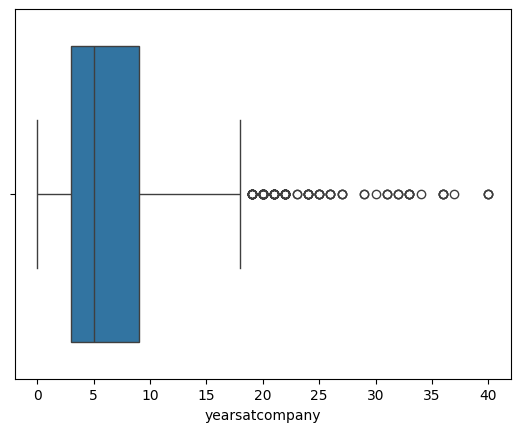

In [ ]:
sns.boxplot(x='yearsatcompany', data=df_clean);

In [ ]:
Q1 = np.nanpercentile(df_clean["yearsatcompany"], 25) #esto es para obtener el 25% de los datos
Q3 = np.nanpercentile(df_clean["yearsatcompany"], 75) #esto es para obtener el 75% de los datos
IQR = Q3 - Q1
salto = IQR * 1.5
Q3 + salto

np.float64(18.0)

In [ ]:
print(Q1, '****', Q3)

3.0 **** 9.0


In [ ]:
df_clean['yearsatcompany'].describe()

count    1678.000000
mean        7.124553
std         6.173837
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: yearsatcompany, dtype: float64

<Axes: xlabel='yearsatcompany', ylabel='Count'>

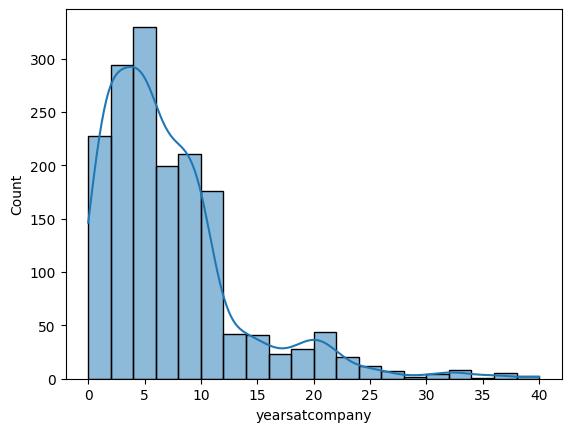

In [ ]:
sns.histplot(x='yearsatcompany', data=df_clean, bins=20, kde=True)

In [ ]:
IQR

np.float64(6.0)

In [ ]:
df_nan_travel = df_clean[['yearsatcompany', 'businesstravel']].loc[df_clean['yearsatcompany'] >= 18].reset_index()

In [ ]:
# Esto sería para cambiar los outliers de los primeros que se inorporaron en la empresa, ya que según PO no viajaban, pero solo nos da para cambiar 60 datos y hay 801.
df_nan_travel.isnull().sum()

index              0
yearsatcompany     0
businesstravel    60
dtype: int64

In [ ]:
df_clean['businesstravel'].isnull().sum() /df_clean.shape[0]*100

np.float64(47.735399284862936)

In [ ]:
df_clean['yearsatcompany'].loc[df_clean['yearsatcompany'] >= 18 | df_clean['yearsatcompany'] <= 40].any().count()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df_clean.groupby('attrition')['yearsatcompany'].median()

attrition
No     6.0
Yes    4.0
Name: yearsatcompany, dtype: float64

In [ ]:
df_clean['maritalstatus'].unique()

array([nan, 'Married', 'Divorced', 'Single', 'divorced', 'Marreid'],
      dtype=object)

In [ ]:
def marital_status (dato):
    try:

        if dato == 'Marreid':
            return dato.rename(columns= {'Marreid': 'married'})
        else:
            return str(dato).lower()
    except:
        return np.nan 

In [ ]:
lista = ['Married', 'Divorced', 'Single', 'divorced', 'Marreid']


In [ ]:
df_clean['maritalstatus'] = df_clean['maritalstatus'].apply(marital_status)

In [ ]:
df_clean['maritalstatus'].unique()

array(['nan', 'married', 'divorced', 'single', nan], dtype=object)

## ELIMINAR COLUMNAS ESPECÍFICAS CON DATOS NULOS. 

In [ ]:
def eliminar_nulos(dataframe, columnas):
    if columnas:
        return dataframe.dropna(subset=columnas)
    return dataframe.dropna()

## RELLENAR VALORES NULOS CON MEDIA/MEDIANA: 

In [ ]:
def rellenar_nulos(dataframe, columna, metodo): #puede ser una opción rellenar los datos por "semejanza con la media/mediana"
    if metodo == "mean":
        valor = dataframe[columna].mean()
        return
    elif metodo == "median":
        valor = dataframe[columna].median()
        return
    else: 
        return dataframe[columna].fillna(valor, inplace=True)

In [ ]:
rellenar_nulos(df_clean, "perfomancerating", "mode")

## ELIMINAR DUPLICADOS (GENERALIZANDO LA FUNCIÓN)

In [ ]:
def eliminar_duplicados(dataframe, columnas):
    return dataframe.drop_duplicates(subset=columnas)

## ESTANDARIZAR STRINGS DE CATEGORÍAS: 

In [ ]:
def estanadrizar_texto(dataframe, columna):
    dataframe[columna] = dataframe[columna].str.strip().str.lower()

## CONVERTIR TIPO DE DATOS (EN EL DATO QUE QUERAMOS)

In [ ]:
def convertir_tipo(dataframe, columna, tipo):
    dataframe[columna] = dataframe[columna].astype(tipo)

## FROMATEAR/ESTANDARIZAR FECHAS: 

In [ ]:
def convertir_a_fecha(dataframe, columna, formato="%Y-%m-%d"): #convertir el "objeto" en "datetime" con el método de pandas. 
    dataframe[columna] = pd.to_datetime(dataframe[columna], format=formato, errors='coerce') #si hay valores que no se pueden convertir con "coerce" lo dejará en NaT (Not A Time).

# PRUEBA TEST A/B:

### PASO 1: 

Crear una nueva columna para asignar empleados a Grupo A o Grupo B según su nivel de satisfacción:

    Grupo A (Control): Satisfacción ≥ 3.
    Grupo B (Variante): Satisfacción < 3.

### PASO 2: 

    Calcular la tasa de rotación en cada grupo.

    Calcular la tasa de rotación como el porcentaje de empleados que tienen "Yes" en la columna Attrition (indicando que dejaron la empresa) para cada grupo.

### PASO 3: Realizar un análisis estadístico

    Realizar una prueba estadística para determinar si la diferencia entre las tasas de rotación de los grupos es significativa.
    En este caso, como estamos comparando proporciones (tasas de rotación), una prueba chi-cuadrado o prueba de proporciones z es adecuada.

    Si 𝑝≤ 0.05: Hay evidencia suficiente para rechazar la hipótesis nula y concluir que existe una diferencia significativa en la rotación entre los grupos.
    
    Si p>0.05: No hay suficiente evidencia para rechazar la hipótesis nula.


In [ ]:
df_clean["performancerating"].mode()

0    3.0
Name: performancerating, dtype: float64

In [ ]:
df_clean["educationfield"] = df_clean["educationfield"].replace("no data", "other")

In [ ]:
df_clean["department"].unique()

array(['research & development', 'no data',
       ' manager  -  research & development ', 'sales', 'human resources',
       ' manager  -  sales ', ' manager  -  human resources '],
      dtype=object)

In [ ]:
df_clean[["jobrole", "department", "joblevel"]].sample(10)

,jobrole,department,joblevel
262,sales representative,sales,1
1122,manager,no data,3
901,sales representative,sales,1
1584,research director,research & development,3
1124,sales executive,sales,2
44,research scientist,research & development,2
1029,sales representative,sales,1
1240,healthcare representative,research & development,3
884,sales representative,sales,1
31,healthcare representative,research & development,3


In [3]:
# Cambiar el orden de las columnas# Primero este paso!!!!!!
nuevo_orden = ['employeenumber','attrition','joblevel', 'jobrole','department','monthlyincome','salary','percentsalaryhike','trainingtimeslastyear','stockoptionlevel','hourlyrate','dailyrate','monthlyrate','standardhours','overtime','businesstravel','distancefromhome','remotework','environmentsatisfaction','jobinvolvement','jobsatisfaction','performancerating','relationshipsatisfaction','worklifebalance','datebirth','age','gender','maritalstatus','education', 'educationfield','numcompaniesworked','totalworkingyears','yearsatcompany','yearssincelastpromotion','yearswithcurrmanager']
df_clean=df_clean[nuevo_orden]
df_clean.head(2)

,employeenumber,attrition,joblevel,jobrole,department,monthlyincome,salary,percentsalaryhike,trainingtimeslastyear,stockoptionlevel,hourlyrate,dailyrate,monthlyrate,standardhours,overtime,businesstravel,distancefromhome,remotework,environmentsatisfaction,jobinvolvement,jobsatisfaction,performancerating,relationshipsatisfaction,worklifebalance,datebirth,age,gender,maritalstatus,education,educationfield,numcompaniesworked,totalworkingyears,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,1,No,5,research director,research & development,16280.83,195370.0,13,5,0,251.96,2015.72,42330.17,Full Time,No,non-travel,6,Yes,1,3,3,3.0,3,3.0,1972,52,M,unknown,3,other,7,NaN,20,15,15
1,2,No,5,manager,general,16665.83,199990.0,14,5,1,257.92,2063.39,43331.17,Full Time,NaN,non-travel,1,Yes,3,2,3,3.0,1,3.0,1971,53,M,unknown,4,life sciences,0,34.0,33,11,9


In [4]:
# Cambiamos el nombre de las columnas
df_clean.columns = ['employee_number','attrition','job_level', 'job_role','department','monthly_income','salary','percent_salary_hike','training_times_last_year','stock_option_level','hourly_rate','daily_rate','monthly_rate','standard_hours','overtime','business_travel','distance_from_home','remote_work','environment_satisfaction','job_involvement','job_satisfaction','performance_rating','relationship_satisfaction','work_life_balance','date_birth','age','gender','marital_status','education', 'education_field','num_companies_worked','total_working_years','years_at_company','years_since_last_promotion','years_with_curr_manager']
df_clean.head(2)

,employee_number,attrition,job_level,job_role,department,monthly_income,salary,percent_salary_hike,training_times_last_year,stock_option_level,hourly_rate,daily_rate,monthly_rate,standard_hours,overtime,business_travel,distance_from_home,remote_work,environment_satisfaction,job_involvement,job_satisfaction,performance_rating,relationship_satisfaction,work_life_balance,date_birth,age,gender,marital_status,education,education_field,num_companies_worked,total_working_years,years_at_company,years_since_last_promotion,years_with_curr_manager
0,1,No,5,research director,research & development,16280.83,195370.0,13,5,0,251.96,2015.72,42330.17,Full Time,No,non-travel,6,Yes,1,3,3,3.0,3,3.0,1972,52,M,unknown,3,other,7,NaN,20,15,15
1,2,No,5,manager,general,16665.83,199990.0,14,5,1,257.92,2063.39,43331.17,Full Time,NaN,non-travel,1,Yes,3,2,3,3.0,1,3.0,1971,53,M,unknown,4,life sciences,0,34.0,33,11,9


In [7]:
duplicados = df_clean[df_clean.duplicated(keep=False)] 
duplicados

,employee_number,attrition,job_level,job_role,department,monthly_income,salary,percent_salary_hike,training_times_last_year,stock_option_level,hourly_rate,daily_rate,monthly_rate,standard_hours,overtime,business_travel,distance_from_home,remote_work,environment_satisfaction,job_involvement,job_satisfaction,performance_rating,relationship_satisfaction,work_life_balance,date_birth,age,gender,marital_status,education,education_field,num_companies_worked,total_working_years,years_at_company,years_since_last_promotion,years_with_curr_manager
8,9,No,4,manager,general,13829.17,165950.00,16,2,1,214.02,1712.18,35955.83,Full Time,No,non-travel,2,Yes,2,3,1,3.0,2,3.0,1982,42,F,married,5,other,7,22.0,18,11,8
60,61,No,2,laboratory technician,research & development,4928.33,59140.00,16,3,0,76.27,610.17,12813.67,Full Time,No,non-travel,5,Yes,4,3,2,3.0,4,4.0,1987,37,M,single,2,other,8,16.0,13,3,7
75,76,No,3,manufacturing director,research & development,8339.32,100071.84,12,4,1,129.06,1032.49,21682.23,Part Time,Yes,travel_rarely,4,Yes,3,2,2,not rated,3,3.0,1976,48,F,divorced,3,life sciences,8,NaN,22,14,10
107,108,No,3,manufacturing director,research & development,8339.32,100071.84,11,1,1,129.06,1032.49,21682.23,Full Time,No,travel_rarely,21,No,2,4,1,3.0,3,3.0,1994,30,F,divorced,4,life sciences,1,10.0,10,8,8
111,112,No,3,sales executive,sales,8339.32,100071.84,12,2,1,129.06,1032.49,21682.23,Part Time,No,travel_rarely,5,Yes,2,3,4,3.0,3,3.0,1993,31,F,unknown,3,other,2,NaN,10,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,824,No,1,research scientist,research & development,3949.17,47390.04,12,2,0,61.12,488.94,10267.83,Full Time,NaN,non-travel,26,Yes,2,4,3,3.0,4,3.0,1980,44,F,single,3,medical,4,NaN,3,1,2
1674,1087,No,5,manager,general,15943.72,191324.62,11,2,1,246.75,1973.98,41453.67,Full Time,No,non-travel,26,No,4,3,3,3.0,3,3.0,1976,48,F,married,4,other,3,27.0,5,1,0
1675,528,No,1,research scientist,research & development,2342.59,28111.13,19,1,0,36.26,290.04,6090.75,Part Time,No,travel_rarely,15,No,3,3,4,3.0,1,3.0,1994,30,M,unknown,3,other,1,6.0,6,1,5
1676,76,No,3,manufacturing director,research & development,8339.32,100071.84,12,4,1,129.06,1032.49,21682.23,Part Time,Yes,travel_rarely,4,Yes,3,2,2,not rated,3,3.0,1976,48,F,divorced,3,life sciences,8,NaN,22,14,10


In [23]:
duplicados["attrition"].value_counts()

attrition
No     102
Yes     26
Name: count, dtype: int64

In [37]:
duplicados.sort_values("employee_number", ascending=False)

,employee_number,attrition,job_level,job_role,department,monthly_income,salary,percent_salary_hike,training_times_last_year,stock_option_level,hourly_rate,daily_rate,monthly_rate,standard_hours,overtime,business_travel,distance_from_home,remote_work,environment_satisfaction,job_involvement,job_satisfaction,performance_rating,relationship_satisfaction,work_life_balance,date_birth,age,gender,marital_status,education,education_field,num_companies_worked,total_working_years,years_at_company,years_since_last_promotion,years_with_curr_manager
1671,1608,No,2,healthcare representative,research & development,4492.84,53914.11,11,2,2,69.53,556.26,11681.39,Part Time,NaN,non-travel,12,Yes,4,3,4,3.0,3,1.0,1992,32,F,unknown,3,medical,0,10.0,9,8,5
1607,1608,No,2,healthcare representative,research & development,4492.84,53914.11,11,2,2,69.53,556.26,11681.39,Part Time,NaN,non-travel,12,Yes,4,3,4,3.0,3,1.0,1992,32,F,unknown,3,medical,0,10.0,9,8,5
1657,1569,No,2,sales executive,sales,4004.17,48050.00,19,3,1,61.97,495.75,10410.83,Part Time,No,travel_rarely,2,No,4,3,2,3.0,2,4.0,1978,46,M,unknown,3,other,0,NaN,8,3,7
1568,1569,No,2,sales executive,sales,4004.17,48050.00,19,3,1,61.97,495.75,10410.83,Part Time,No,travel_rarely,2,No,4,3,2,3.0,2,4.0,1978,46,M,unknown,3,other,0,NaN,8,3,7
1638,1568,No,2,sales executive,sales,3375.83,40510.00,14,2,1,52.24,417.96,8777.17,Part Time,No,travel_rarely,2,Yes,2,3,4,3.0,1,3.0,1975,49,F,married,5,other,2,14.0,9,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,76,No,3,manufacturing director,research & development,8339.32,100071.84,12,4,1,129.06,1032.49,21682.23,Part Time,Yes,travel_rarely,4,Yes,3,2,2,not rated,3,3.0,1976,48,F,divorced,3,life sciences,8,NaN,22,14,10
1652,61,No,2,laboratory technician,research & development,4928.33,59140.00,16,3,0,76.27,610.17,12813.67,Full Time,No,non-travel,5,Yes,4,3,2,3.0,4,4.0,1987,37,M,single,2,other,8,16.0,13,3,7
60,61,No,2,laboratory technician,research & development,4928.33,59140.00,16,3,0,76.27,610.17,12813.67,Full Time,No,non-travel,5,Yes,4,3,2,3.0,4,4.0,1987,37,M,single,2,other,8,16.0,13,3,7
1656,9,No,4,manager,general,13829.17,165950.00,16,2,1,214.02,1712.18,35955.83,Full Time,No,non-travel,2,Yes,2,3,1,3.0,2,3.0,1982,42,F,married,5,other,7,22.0,18,11,8


In [33]:
duplicados

KeyError: False

In [26]:
son_iguales

False